In [1]:
#%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#----------DATA READING 
filename = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.head())


   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
#----------DATA CLEANUP 
csv_data.columns = column_names # new_header #set the header row as the data header
print(csv_data.head()) 
# look at simple data statistics
print(csv_data.describe().transpose())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


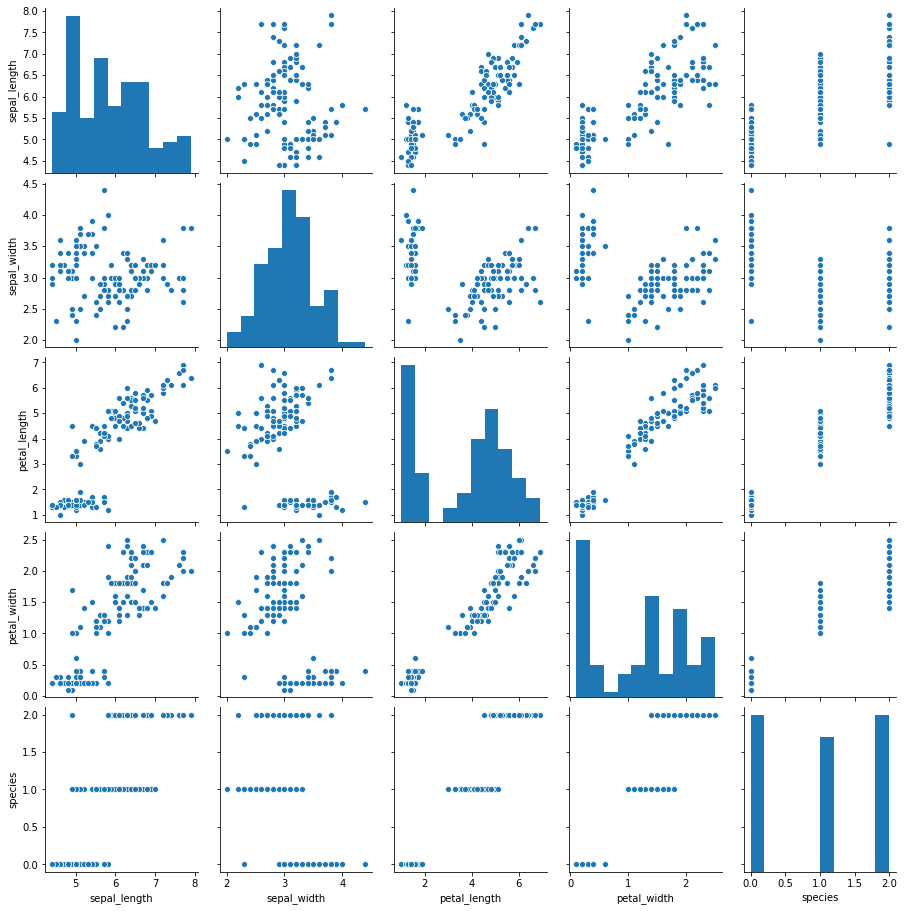

In [3]:
# plot of all features agains each other
sns.pairplot(csv_data)

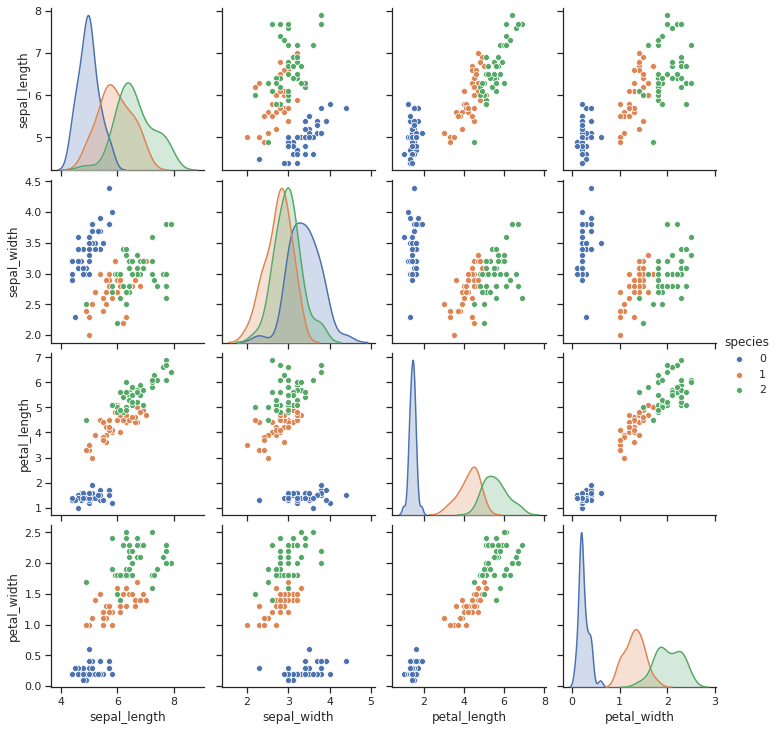

In [4]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species') 

In [5]:
#----------TRAIN/TEST SPLIT 
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']
# normalize the training data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

# separate out the y (results) from x (features) testing
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']
# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
               count      mean       std  min       25%       50%       75%  \
sepal_length   96.0  0.406250  0.254209  0.0  0.171429  0.371429  0.571429   
sepal_width    96.0  0.406723  0.196906  0.0  0.272727  0.386364  0.545455   
petal_length   96.0  0.436794  0.313449  0.0  0.084746  0.533898  0.694915   
petal_width    96.0  0.424479  0.326873  0.0  0.072917  0.500000  0.708333   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width   1.0  
Test Data
               count      mean       std  min       25%       50%       75%  \
sepal_length   24.0  0.530172  0.272052  0.0  0.396552  0.551724  0.724138   
sepal_width    24.0  0.591146  0.242397  0.0  0.500000  0.625000  0.750000   
petal_length   24.0  0.625000  0.310206  0.0  0.524510  0.715686  0.848039   
petal_width    24.0  0.568841  0.306076  0.0  0.413043  0.695652  0.750000   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width 

In [6]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 3 nodes in the output for 'species'
    tf.keras.layers.Dense(3, name="Output_Layer")
  ])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              # loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # list of metrics to monitor
              metrics=['acc',])

model.summary()

4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [7]:
#--------SANITY CHECK
# take an example batch and try to predict (we haven't trained yet!)
example_batch = x_train[:10]
# this gives the log likelihood of the the classes
example_result_log = model.predict(example_batch)
print('Likelihood', example_result_log)
# this gives the probabilities of the classes (should sum up to 1)
example_result_prob = tf.nn.softmax(example_result_log).numpy()
# these values should be similar and equal to (1/3), because we haven't trained yet and weights are random
print('Probabilities', example_result_prob)


Likelihood [[-0.06289624  0.28027987 -0.35267764]
 [ 0.0432796   0.0298437  -0.09033278]
 [-0.06926762  0.27062136 -0.38052422]
 [-0.05955834  0.23796849 -0.33352786]
 [ 0.02710932  0.07809821 -0.16412258]
 [-0.06502038  0.2570417  -0.4218563 ]
 [ 0.0167245   0.0947649  -0.13574769]
 [ 0.02140347  0.05956085 -0.08841428]
 [-0.09157681  0.34804052 -0.4779024 ]
 [-0.05687226  0.22068349 -0.30670512]]
Probabilities [[0.31667176 0.44632253 0.23700573]
 [0.3494569  0.34479305 0.30575   ]
 [0.31874365 0.44776842 0.23348798]
 [0.32186633 0.4334009  0.24473275]
 [0.34743306 0.3656077  0.28695923]
 [0.3246903  0.44806302 0.22724664]
 [0.34016508 0.36777502 0.29205987]
 [0.34072804 0.35398057 0.30529144]
 [0.30943826 0.4802832  0.21027853]
 [0.32270238 0.42593476 0.2513629 ]]


In [12]:
# Fit/TRAIN model on training data
history = model.fit(x_train, y_train,
                    batch_size=4,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1715 - acc: 0.9605 - val_loss: 0.1594 - val_acc: 0.9500
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1706 - acc: 0.9605 - val_loss: 0.1512 - val_acc: 0.9000
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1622 - acc: 0.9605 - val_loss: 0.1458 - val_acc: 0.9000
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1586 - acc: 0.9605 - val_loss: 0.1410 - val_acc: 0.9000
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1537 - acc: 0.9474 - val_loss: 0.1423 - val_acc: 0.9000
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1483 - acc: 0.9605 - val_loss: 0.1383 - val_acc: 0.9500
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1410 - acc: 0.9737 - val_loss: 0.1427 - val_acc: 0.9500
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1406 - a

19/19 [==============================] - 0s 2ms/step - loss: 0.0695 - acc: 0.9474 - val_loss: 0.0301 - val_acc: 1.0000
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0718 - acc: 0.9474 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0728 - acc: 0.9737 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 66/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0673 - acc: 0.9737 - val_loss: 0.0214 - val_acc: 1.0000
Epoch 67/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0773 - acc: 0.9605 - val_loss: 0.0240 - val_acc: 1.0000
Epoch 68/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0722 - acc: 0.9605 - val_loss: 0.0204 - val_acc: 1.0000
Epoch 69/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0692 - acc: 0.9605 - val_loss: 0.0276 - val_acc: 1.0000
Epoch 70/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0730 - acc: 0

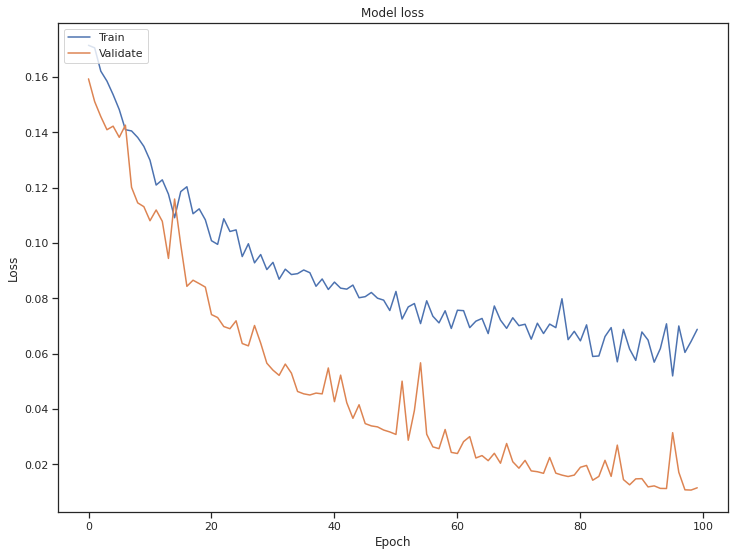

In [13]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [14]:
#--------EVALUATE
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'Accuracy:', acc)

1/1 - 0s - loss: 0.2953 - acc: 0.8750
Loss: 0.2952990233898163 Accuracy: 0.875


In [15]:
#--------PREDICT

p_test = model.predict(x_test) # get the log likelihoods
p_test_probabs = tf.nn.softmax(p_test).numpy() # convert to probabilities
p_test_class = np.argmax(p_test_probabs, axis=1) # get the max out of the 3 probabilities
print("Predicted Class:", p_test_class, '\nActuals:\n', y_test.to_string(index=False))
#p_test = model.predict_classes(x_test)
#print(p_test)

Predicted Class: [1 0 1 2 1 1 2 2 0 1 2 1 2 0 2 2 1 1 2 1 2 0 2 1] 
Actuals:
  1
 0
 1
 2
 1
 2
 2
 2
 0
 2
 2
 1
 2
 0
 2
 2
 2
 1
 2
 1
 2
 0
 2
 1


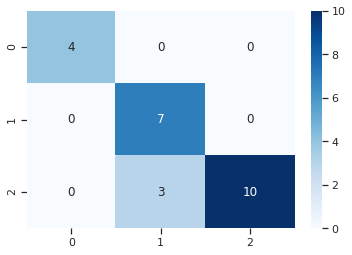

In [16]:
# plot the confision matrix as heatmap
sns.heatmap(tf.math.confusion_matrix(y_test, p_test_class), cmap="Blues", annot=True)